In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
from PIL import Image

In [3]:
def openH5(filename):
    with h5py.File(filename, "r") as f:
        # List all groups
        print("Keys: %s" % f.keys())
        # Get the data
        header = list(f.keys())
        classes = f[header[0]]
        x = f[header[1]]
        y = f[header[2]]
        classes = np.array(classes)
        x = np.array(x)
        y = np.array(y)
        f.close()
    return classes, header, x, y

In [4]:
test_classes, test_header, test_set_x, test_set_y = openH5("test_catvnoncat.h5")
train_classes, train_header, train_set_x, train_set_y = openH5("train_catvnoncat.h5")

Keys: <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
Keys: <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


y = 1, it's a 'cat' picture.
total number of train_set_x: 209
total number of train_set_y: 209


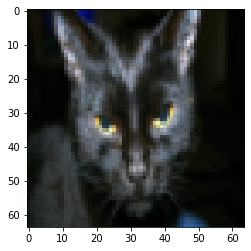

In [5]:
index = 25
np.random.seed(1)
plt.imshow(train_set_x[index])
print("y = " + str(train_set_y[index]) + ", it's a '" + train_classes[np.squeeze(train_set_y[index])].decode(
    "utf-8") + "' picture.")
print("total number of " + str(train_header[1]) + ": " + str(train_set_x.shape[0]))
print("total number of " + str(train_header[2]) + ": " + str(train_set_y.shape[0]))

In [6]:
train_set_y = train_set_y.reshape(-1,1).T
test_set_y = test_set_y.reshape(-1,1).T

In [7]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [8]:
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0],-1).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0],-1).T

In [9]:
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [10]:
### CONSTANTS DEFINING THE MODEL ####
train_x = train_set_x_flatten/255.
test_x = test_set_x_flatten/255.

n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [11]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    # YOUR CODE ENDS HERE
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [12]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        #(≈ 2 lines of code)
        # parameters['W' + str(l)] = ...
        # parameters['b' + str(l)] = ...
        # YOUR CODE STARTS HERE
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        # YOUR CODE ENDS HERE
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [13]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    #(≈ 1 line of code)
    # Z = ...
    # YOUR CODE STARTS HERE
    
    Z = np.dot(W, A) + b
    # YOUR CODE ENDS HERE
    cache = (A, W, b)
    
    return Z, cache

In [14]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    Z, linear_cache = linear_forward(A_prev, W, b)
    if activation == "sigmoid":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        A, activation_cache = sigmoid(Z)
        
        # YOUR CODE ENDS HERE
    
    elif activation == "relu":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        A, activation_cache = relu(Z)
        
        # YOUR CODE ENDS HERE
    cache = (linear_cache, activation_cache)

    return A, cache

In [15]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        #(≈ 2 lines of code)
        # A, cache = ...
        # caches ...
        # YOUR CODE STARTS HERE
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)],
                                            parameters['b' + str(l)], activation='relu')
        caches.append(cache)
        # YOUR CODE ENDS HERE
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    #(≈ 2 lines of code)
    # AL, cache = ...
    # caches ...
    # YOUR CODE STARTS HERE
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], 
                                          parameters['b' + str(L)], activation='sigmoid')
    caches.append(cache)
    
    # YOUR CODE ENDS HERE
          
    return AL, caches

In [16]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    # (≈ 1 lines of code)
    # cost = ...
    # YOUR CODE STARTS HERE
    cost = -1 / m * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL)))
    
    # YOUR CODE ENDS HERE
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

In [17]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    # dW = ...
    # db = ... sum by the rows of dZ with keepdims=True
    # dA_prev = ...
    # YOUR CODE STARTS HERE
    dW = np.dot(dZ, cache[0].T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(cache[1].T, dZ)
    
    # YOUR CODE ENDS HERE
    
    return dA_prev, dW, db

In [18]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        
        dZ = relu_backward(dA, activation_cache)
        # YOUR CODE ENDS HERE
        
    elif activation == "sigmoid":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        dZ = sigmoid_backward(dA, activation_cache)
        
        
        # YOUR CODE ENDS HERE
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

In [19]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    #(1 line of code)
    # dAL = ...
    # YOUR CODE STARTS HERE
    dAL = - (np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, "sigmoid")
    grads["dA" + str(L-1)] =dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dA_prev_temp, current_cache, 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [20]:
def update_parameters(params, grads, learning_rate):
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] =parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
    return parameters

In [21]:

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # YOUR CODE ENDS HERE
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        #(≈ 2 lines of code)
        # A1, cache1 = ...
        # A2, cache2 = ...
        # YOUR CODE STARTS HERE
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        
        # YOUR CODE ENDS HERE
        
        # Compute cost
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = compute_cost(A2, Y)
        
        # YOUR CODE ENDS HERE
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        #(≈ 2 lines of code)
        # dA1, dW2, db2 = ...
        # dA0, dW1, db1 = ...
        # YOUR CODE STARTS HERE
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        
        # YOUR CODE ENDS HERE
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        #(approx. 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [22]:
print(train_set_x_flatten)

[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]


In [23]:
def relu(x):
    return x * (x > 0), x

In [24]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s, z

In [25]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ

In [26]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [ ]:
X = train_x
parameters = initialize_parameters(n_x, n_h, n_y)
W1 = parameters["W1"]
b1 = parameters["b1"]
Z, linear_cache = linear_forward(X, W1, b1)
print(X)
print(Z)
A, activation_cache = sigmoid(Z)
print("----")
print(A)
print(activation_cache)
print(A==activation_cache)

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.400797753620389
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.30527536361962637
Cost after iteration 1200: 0.27491377282130197
Cost after iteration 1300: 0.24681768210614832
Cost after iteration 1400: 0.19850735037466116
Cost after iteration 1500: 0.1744831811255664
Cost after iteration 1600: 0.17080762978095304
Cost after iteration 1700: 0.11306524562164758
Cost after iteration 1800: 0.09629426845937161
Cost after iteration 1900: 0.08342617959726858
Cost after iteration 2000: 0.07439078704319077
Cost after iteration 2100: 0.066307481

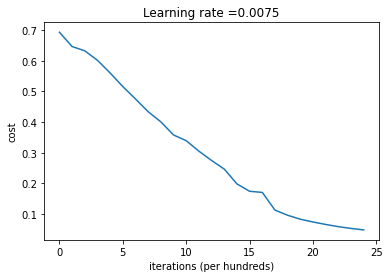

In [28]:
parameters, costs = two_layer_model(train_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)


In [161]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    print(W1.shape)
    print(X.shape)
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    print("Z1", Z1.shape)
    A1, XX = relu(Z1)
    print("A1", A1.shape)
    Z2 = np.dot(W2, A1) + b2
    print("Z2", Z2.shape)
    A2, XX = sigmoid(Z2)
    print("A2", A2.shape)
    ### END CODE HERE ###
    
    # assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [170]:
def predict(X, Y, parameters):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    #w = w.reshape(X.shape[0], 1)
    A, cache = forward_propagation(X, parameters)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    accuracy = float((np.dot(Y,Y_prediction.T) + np.dot(1 - Y, 1 - Y_prediction.T)) / float(Y.size)*100)
    print ("Accuracy: {} %".format(accuracy))
    return Y_prediction






In [171]:
predictions_train = predict(train_x, train_set_y, parameters)


(7, 12288)
(12288, 209)
Z1 (7, 209)
A1 (7, 209)
Z2 (1, 209)
A2 (1, 209)
Accuracy: 100.0 %


In [172]:
predictions_test = predict(test_x, test_set_y, parameters)


(7, 12288)
(12288, 50)
Z1 (7, 50)
A1 (7, 50)
Z2 (1, 50)
A2 (1, 50)
Accuracy: 72.0 %


NameError: name 'logistic_regression_model' is not defined

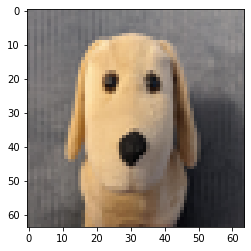

In [84]:
my_image = "nell.jpg"   

fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + test_classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

NameError: name 'logistic_regression_model' is not defined

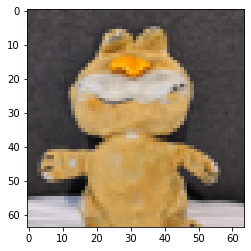

In [32]:
my_image = "bao.jpg"   

fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + test_classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [ ]:
my_image = "my_image.jpg"   

fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + test_classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")